In [1]:
%config Completer.use_jedi = False

In [39]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import sklearn.gaussian_process as gp
from sklearn.model_selection import train_test_split

In [34]:
kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.RBF(10.0, (1e-3, 1e3))

In [41]:
df = pd.read_csv('df_adhdraw.csv')
df = df.drop('Unnamed: 0', axis = 1)
df.head()

,Subject_ID,cpadhd_raw,CHILDgender,zfALFF_17Networks_9,zfALFF_17Networks_2,zfALFF_lPFtha_L,zfALFF_cTtha_L,zfALFF_Otha_L,zfALFF_rTtha_R,zfALFF_rTtha_L,...,zDCwei_17Networks_RH_SomMotA_6,zDCwei_17Networks_LH_DefaultC_PHC_3,zDCwei_17Networks_LH_DefaultB_Temp_5,zDCwei_17Networks_LH_ContB_Temp_2,zDCwei_17Networks_LH_SalVentAttnA_FrMed_2,zDCwei_17Networks_LH_SalVentAttnA_FrMed_1,zDCwei_17Networks_LH_SalVentAttnA_ParMed_1,zDCwei_17Networks_LH_SalVentAttnA_ParOper_1,zDCwei_17Networks_LH_DorsAttnB_PostC_1,zDCwei_17Networks_LH_DorsAttnA_TempOcc_2
0,sub-0015,0.0,1,-0.787030,-0.445804,-0.929277,-0.743303,-0.701746,-0.843242,-0.764751,...,0.570004,-0.130038,-0.047269,0.388094,0.158019,0.257226,0.094419,0.157887,0.042376,-0.074321
1,sub-0085,1.0,0,-0.601078,-0.304966,-0.397031,-0.381863,-0.449357,-0.341996,-0.347692,...,0.280915,-0.321277,-0.009029,-0.196261,0.080881,0.170051,0.153607,0.192767,-0.052853,0.049870
2,sub-0134,0.0,1,-0.799635,-0.231216,-0.840667,-0.901478,-0.487365,-0.710494,-0.512793,...,0.631763,0.249275,0.492542,0.465131,0.149572,0.168241,0.310641,0.219820,0.148504,0.236822
3,sub-0152,2.0,0,-0.485006,-0.223685,-0.294288,-0.634390,-0.597999,-0.640255,-0.425914,...,-0.034122,0.082488,0.263105,0.375573,-0.179384,0.009714,0.205987,0.018744,0.069715,0.291880
4,sub-0260,14.0,1,-0.853856,-0.356149,-0.863769,-0.617213,-0.475704,-0.797962,-0.641054,...,-0.181578,0.304288,0.449225,0.739805,0.125963,0.116520,0.293805,0.122458,-0.000745,0.174841


In [42]:
df.drop(['CHILDgender', 'Subject_ID'], axis = 1, inplace = True)

In [43]:
df = df.dropna()
#for val in df['cpadhd_raw']:
 #   print(val)

In [44]:
X = df.iloc[:,1:185].values
Y = df.iloc[:,0].values

In [45]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4, random_state = 10) 
# random_state = whatever is being done to choose the test samples randomly, I want this randomness to be the same every time I run the script (otherwise everytime we have a different test dataset)

In [46]:
model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1,normalize_y=True)

In [48]:
model.fit(x_train, y_train)

GaussianProcessRegressor(alpha=0.1, kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=10, normalize_y=True)

In [49]:
params = model.kernel_.get_params()

In [50]:
y_pred, std = model.predict(x_train, return_std=True)

In [55]:
MSE = ((y_pred - y_train)**2).mean()

In [56]:
MSE

0.43414251527928926

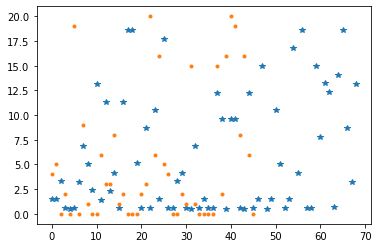

In [57]:
plt.plot(y_pred, '*')
plt.plot(y_test, '.')